In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## MODULE 1


In [3]:
#read data
data=pd.read_csv("3.01. Country Clusters.csv")

In [4]:
#data head
data.head()
#these are geographic centres of these countries

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


In [9]:
data_mapped=data.copy()
data_mapped['Language']=data['Language'].map({"English":0,"French":1,"German":2})

In [10]:
data_mapped


,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


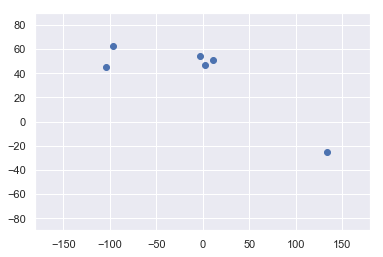

In [11]:
plt.scatter(data_mapped['Longitude'],data_mapped['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [25]:
#Feature selection and slicing data acc.
x=data_mapped.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [26]:
kmeans=KMeans(3)


In [27]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
#clusters
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([1, 1, 0, 0, 0, 2])

In [29]:
data_with_clusters=data_mapped.copy()
data_with_clusters['Cluster']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,0
3,UK,54.01,-2.53,0,0
4,Germany,51.15,10.40,2,0
5,Australia,-25.45,133.11,0,2


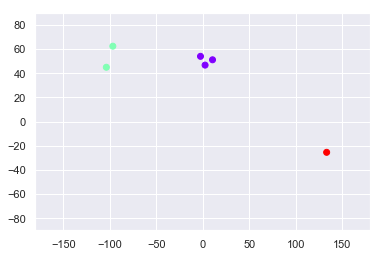

In [30]:
#plot
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## MODULE 2


In [31]:
data=pd.read_csv("3.12. Example.csv")

In [32]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

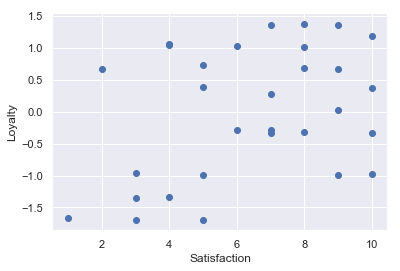

In [36]:
#plot data
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

In [37]:
x=data.copy()

In [40]:
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [41]:
clusters=x.copy()
clusters['Cluster']=kmeans.fit_predict(x)
clusters

,Satisfaction,Loyalty,Cluster
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


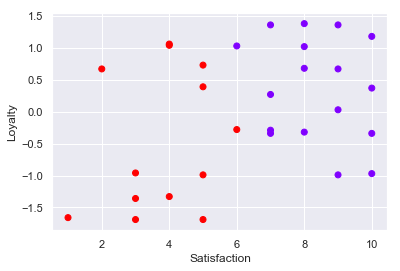

In [43]:
#plot
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['Cluster'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

#Look at the graph , looks like divided by satisfaction=6 ? loyalty role supressed due to high values of satisfacgtion 
#Solution => standardise

In [45]:
#Standardise 
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [47]:
#elbow to find clusters
wcss=[]
for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.6281722684597675,
 5.423830011052964,
 4.430999057496253,
 3.8067995963754537]

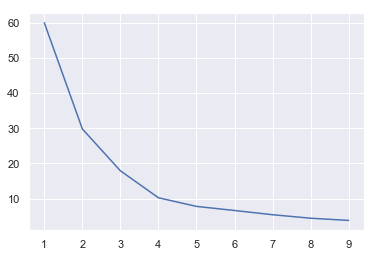

In [48]:
#elbow plot
plt.plot(range(1,10),wcss)

#k=4 seems fine :p

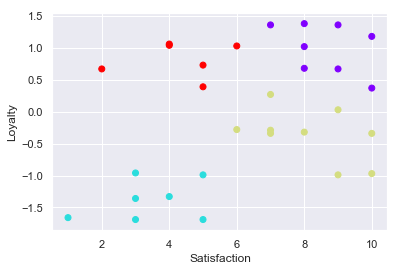

In [55]:
#to try diff cluster values and plot
kmeans=KMeans(4)
kmeans.fit(x_scaled)

#store cluster in data
clusters=x.copy()
clusters['Cluster']=kmeans.fit_predict(x_scaled)

#plot
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['Cluster'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()